# Customer Segmentation Using Clustering 

## Problem Statement

XYZ.com is an e-commerce company based in Argentina. They have past order details which includes customer personal details like customer name, address, etc and order details like order quantity, sales, product code, etc.
The company wants to understand if there is any pattern among these customers and use it for making more profit. They want to analyse the sales data wrt to customers and identify high yield groups of customers.

Objective:
We will use clustering techniques to identify the segment of customers. We will see if this groups are similar or different. We will analyse these groups and brainstorm about how this info can be utlised to make an informed business decision.

## Table of Content

1. Import Libraries

2. Setting options

3. Read Data

4. Data Analysis and Preparation

    4.1 - Data Types and Summary Statistics

    4.2 - Missing Values

    4.3 - Data Cleansing and Univariate Analysis

    4.4 - Bivariate Analysis & Multivariate Analysis

    4.5 - Data Preparation

5. K-means Clustering

6. Hierarchical Clustering

7. Conclusion and Interpretation

## 1. Import Libraries

In [160]:
# used to supress display of warnings
import warnings

# os is used to provide a way of using operating system dependent functionality
# We use it for setting working folder
import os

# Pandas is used for data manipulation and analysis
import pandas as pd 

# Numpy is used for large, multi-dimensional arrays and matrices, along with mathematical operators on these arrays
import numpy as np

# Matplotlib is a data visualization library for 2D plots of arrays, built on NumPy arrays 
# and designed to work with the broader SciPy stack
import matplotlib.pyplot as plt
%matplotlib inline

# Seaborn is based on matplotlib, which aids in drawing attractive and informative statistical graphics.
import seaborn as sns


## Scikit-learn features various classification, regression and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import average_precision_score, confusion_matrix, accuracy_score, classification_report, plot_confusion_matrix

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree


## 2. Setting Options

In [259]:
# suppress display of warnings
warnings.filterwarnings('ignore')

# display all dataframe columns
pd.options.display.max_columns = None

# to set the limit to 3 decimals
pd.options.display.float_format = '{:.3f}'.format

# display all dataframe rows
pd.options.display.max_rows = None

## 3. Read Data

In [260]:
# read csv file using pandas
df = pd.read_csv('sales_data_sample.csv', encoding='unicode_escape')

In [261]:
# to display the top 5 rows of the dataframe
df.sample(5)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
2472,10283,45,78.670,9,3540.150,8/20/2004 0:00,Shipped,3,8,2004,Ships,66,S700_1138,"Royal Canadian Collectables, Ltd.",(604) 555-4555,23 Tsawassen Blvd.,NaN,Tsawassen,BC,T2F 8M4,Canada,NaN,Lincoln,Elizabeth,Medium
1957,10273,48,83.020,3,3984.960,7/21/2004 0:00,Shipped,3,7,2004,Vintage Cars,83,S24_3816,Petit Auto,(02) 5554 67,Rue Joseph-Bens 532,NaN,Bruxelles,NaN,B-1180,Belgium,EMEA,Dewey,Catherine,Medium
706,10151,49,100.000,6,5412.540,9/21/2003 0:00,Shipped,3,9,2003,Trucks and Buses,122,S18_2319,"Oulu Toy Supplies, Inc.",981-443655,Torikatu 38,NaN,Oulu,NaN,90110,Finland,EMEA,Koskitalo,Pirkko,Medium
734,10182,20,100.000,7,2212.000,11/12/2003 0:00,Shipped,4,11,2003,Vintage Cars,127,S18_2325,Mini Gifts Distributors Ltd.,4155551450,5677 Strong St.,NaN,San Rafael,CA,97562,USA,NaN,Nelson,Valarie,Small
1552,10288,29,38.170,1,1106.930,9/1/2004 0:00,Shipped,3,9,2004,Vintage Cars,33,S24_1937,Handji Gifts& Co,+65 224 1555,Village Close - 106 Linden Road Sandown,2nd Floor,Singapore,NaN,69045,Singapore,APAC,Victorino,Wendy,Small


## 4.  Data Analysis and Preparation

Data preparation is the process of cleaning and transforming raw data prior to building machine learning models.

Here we will analyze and prepare data to perform clustering techniques:

1. Check dimensions of the dataframe in terms of rows and columns
2. Check data types. Ensure your data types are correct. Refer data definitions to validate
3. If data types are not as per business definition, change the data types as per requirement
4. Study summary statistics
5. Check for missing values
6. Univariate Analysis and required imputation
7. Bivariate analysis and inferences
7. Data preparation for model building

Note: it is an art to explore data and one will need more and more practice to gain expertise in this area

In [262]:
# to display the dimension of the dataframe
df.shape

(2823, 25)

In [263]:
# to display the column names of the dataframe
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

## 4.1 Data Types and Summary Statistics

In [264]:
# check the datatypes
df.dtypes

ORDERNUMBER           int64
QUANTITYORDERED       int64
PRICEEACH           float64
ORDERLINENUMBER       int64
SALES               float64
ORDERDATE            object
STATUS               object
QTR_ID                int64
MONTH_ID              int64
YEAR_ID               int64
PRODUCTLINE          object
MSRP                  int64
PRODUCTCODE          object
CUSTOMERNAME         object
PHONE                object
ADDRESSLINE1         object
ADDRESSLINE2         object
CITY                 object
STATE                object
POSTALCODE           object
COUNTRY              object
TERRITORY            object
CONTACTLASTNAME      object
CONTACTFIRSTNAME     object
DEALSIZE             object
dtype: object

In [265]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [266]:
df.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')

- There are many object type features
- Continuous variables :- QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, MSRP
- Discrete variables/Categorical :- QTR_ID, MONTH_ID, YEAR_ID, STATUS, PRODUCTLINE, 'CITY', 'STATE',  'COUNTRY', 'TERRITORY, 'DEALSIZE'
- Cols to drop - ORDERNUMBER, ORDERDATE, 'POSTALCODE', PRODUCTCODE, CUSTOMERNAME, PHONE, ADDRESSLINE1, ADDRESSLINE2, ADDRESSLINE2

#### The below output prints the important summary statistics of all the numeric variables like the mean, median (50%), minimum, and maximum values, along with the standard deviation.

In [267]:
# describe the numerical data
df.describe()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000,2823.000,2823.000,2823.000,2823.000,2823.000,2823.000,2823.000,2823.000
mean,10258.725,35.093,83.659,6.466,3553.889,2.718,7.092,2003.815,100.716
std,92.085,9.741,20.174,4.226,1841.865,1.204,3.657,0.700,40.188
min,10100.000,6.000,26.880,1.000,482.130,1.000,1.000,2003.000,33.000
25%,10180.000,27.000,68.860,3.000,2203.430,2.000,4.000,2003.000,68.000
50%,10262.000,35.000,95.700,6.000,3184.800,3.000,8.000,2004.000,99.000
75%,10333.500,43.000,100.000,9.000,4508.000,4.000,11.000,2004.000,124.000
max,10425.000,97.000,100.000,18.000,14082.800,4.000,12.000,2005.000,214.000


In [268]:
df.describe(include = 'O').T

,count,unique,top,freq
ORDERDATE,2823,252,11/14/2003 0:00,38
STATUS,2823,6,Shipped,2617
PRODUCTLINE,2823,7,Classic Cars,967
PRODUCTCODE,2823,109,S18_3232,52
CUSTOMERNAME,2823,92,Euro Shopping Channel,259
PHONE,2823,91,(91) 555 94 44,259
ADDRESSLINE1,2823,92,"C/ Moralzarzal, 86",259
ADDRESSLINE2,302,9,Level 3,55
CITY,2823,73,Madrid,304
STATE,1337,16,CA,416


## 4.2 Missing Values

In [269]:
# check for missing values
missing_values = df.isnull().sum()/len(df)*100

# print the number of missing values of each variable
print(missing_values)

ORDERNUMBER         0.000
QUANTITYORDERED     0.000
PRICEEACH           0.000
ORDERLINENUMBER     0.000
SALES               0.000
ORDERDATE           0.000
STATUS              0.000
QTR_ID              0.000
MONTH_ID            0.000
YEAR_ID             0.000
PRODUCTLINE         0.000
MSRP                0.000
PRODUCTCODE         0.000
CUSTOMERNAME        0.000
PHONE               0.000
ADDRESSLINE1        0.000
ADDRESSLINE2       89.302
CITY                0.000
STATE              52.639
POSTALCODE          2.692
COUNTRY             0.000
TERRITORY          38.045
CONTACTLASTNAME     0.000
CONTACTFIRSTNAME    0.000
DEALSIZE            0.000
dtype: float64


- Here we can see the column ADDRESSLINE2 has 89.3% of missing values, STATE has 52.6% of missing values.
- POSTALCODE has around 2.69% and TERRITORY has around 38%.

## 4.3 Univariate Analysis

### 4.3.1 STATUS

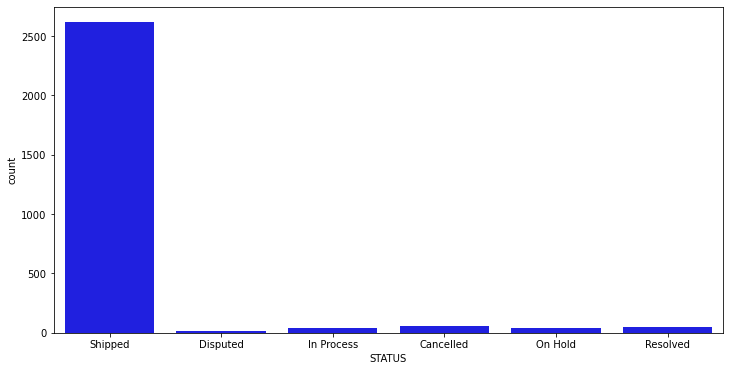

In [270]:
sns.countplot(df['STATUS'],  color = 'blue')

- We will convert the labels of the STATUS column to 0 and 1. For Shipped assign value 1 and for all other labels (i.e. ‘Cancelled’,’ Resolved’,’ On Hold’,’ In Process’, 'Disputed') assign 0. Note we will consider everything apart from Shipped as cancel (i.e. 0)

In [271]:
df['STATUS']=df['STATUS'].map({'Shipped':1,'Cancelled':0,'Resolved':0,'On Hold':0,'In Process':0,'Disputed':0})

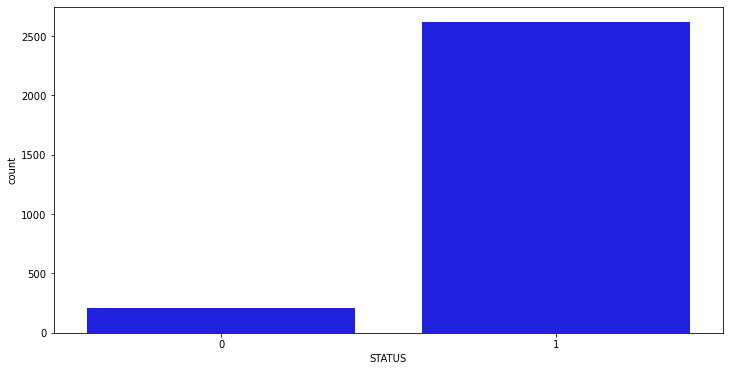

In [272]:
sns.countplot(df['STATUS'],  color = 'blue')

- We will drop status column as it is a target feature and it may influence the clustering outcome

### 4.3.2 Convert order date to datetime format

In [273]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Check the type of data
df['ORDERDATE'].head(2)

0   2003-02-24
1   2003-05-07
Name: ORDERDATE, dtype: datetime64[ns]

### 4.3.3 COUNTRY,  PRODUCTLINE, DEALSIZE

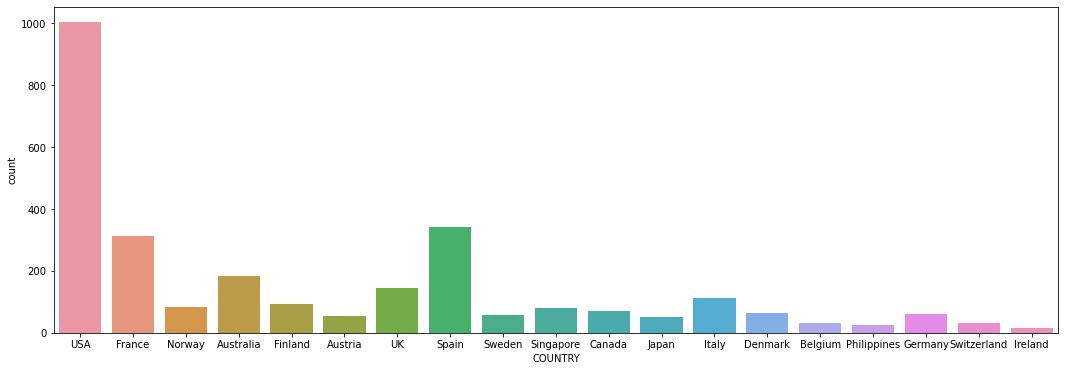

In [274]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 18,6
ax  = sns.countplot(df['COUNTRY'])

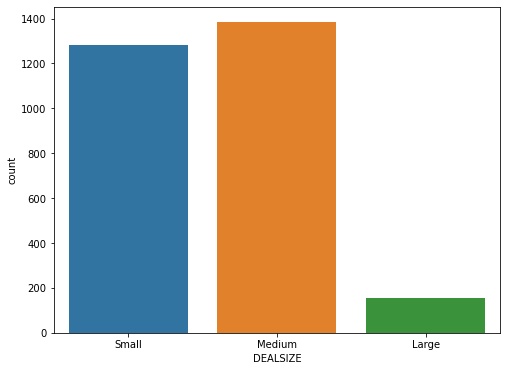

In [275]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 8,6
ax  = sns.countplot(df['DEALSIZE'])

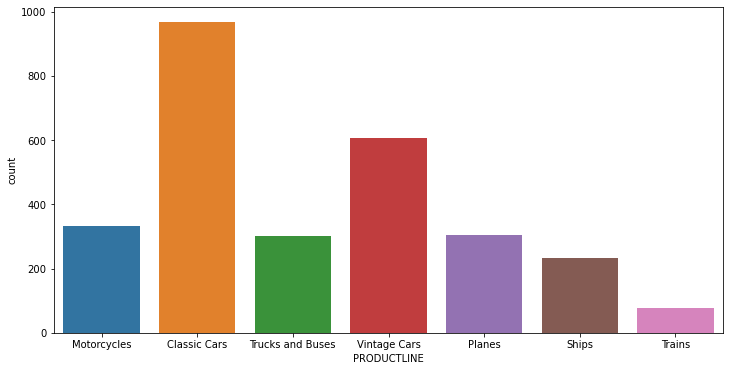

In [276]:
from matplotlib import rcParams

# figure size in inches
rcParams['figure.figsize'] = 12,6
ax  = sns.countplot(df['PRODUCTLINE'])

### 4.3.4 One-hot encoding categorical features

In [277]:
dff = pd.get_dummies(data=df, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY'],drop_first= True )
dff.shape

(2823, 48)

In [278]:
dff.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2',
       'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trains',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'DEALSIZE_Medium', 'DEALSIZE_Small', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

### 4.3.5 Continuous features - QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, MSRP

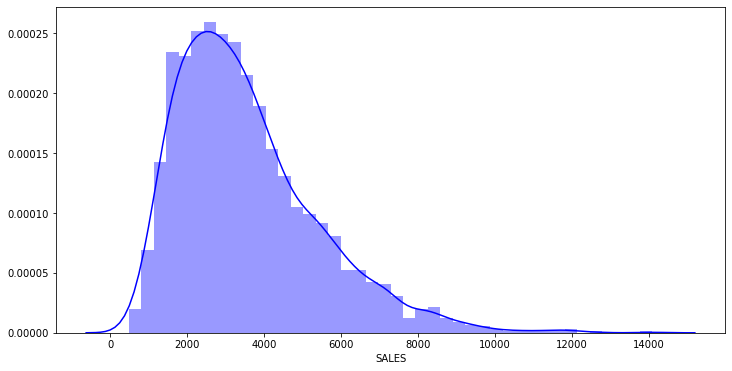

In [279]:
sns.distplot(dff['SALES'], kde=True, hist=True, color = 'blue')

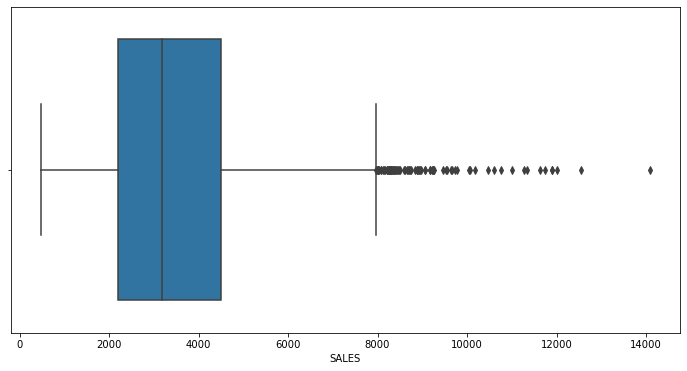

In [280]:
sns.boxplot(dff['SALES'])

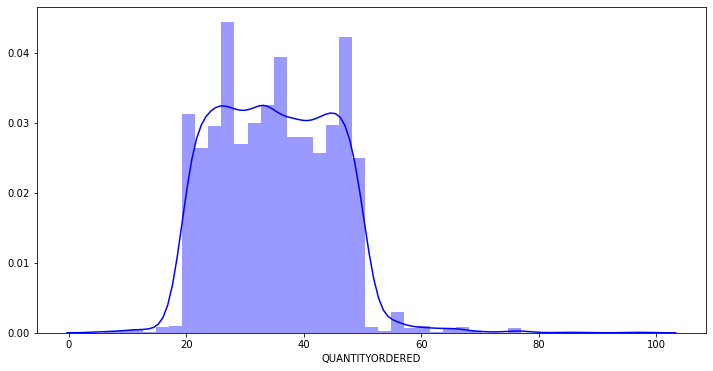

In [281]:
sns.distplot(dff['QUANTITYORDERED'], kde=True, hist=True, color = 'blue')

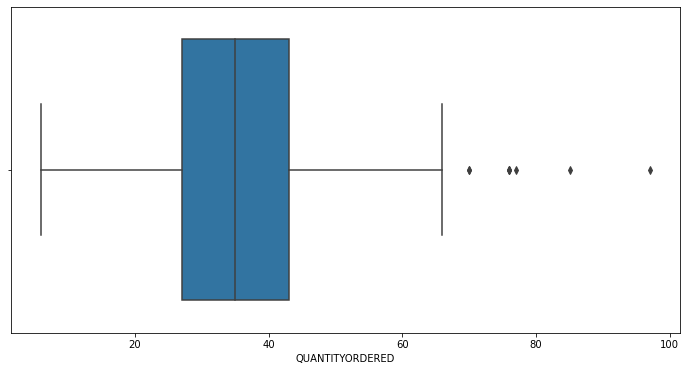

In [282]:
sns.boxplot(dff['QUANTITYORDERED'])

- We can see that the orders are bulk orders. Majority of the order's quantity are between 20 -40 units.
- It is quite uniform but skewed toward right side.

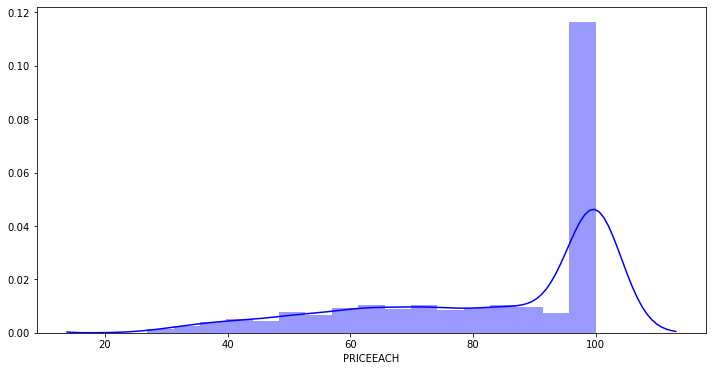

In [283]:
sns.distplot(dff['PRICEEACH'], kde=True, hist=True, color = 'blue')

- The distribution of Price is Left Skewed with max price of 100 
- The majority of price is 100$.

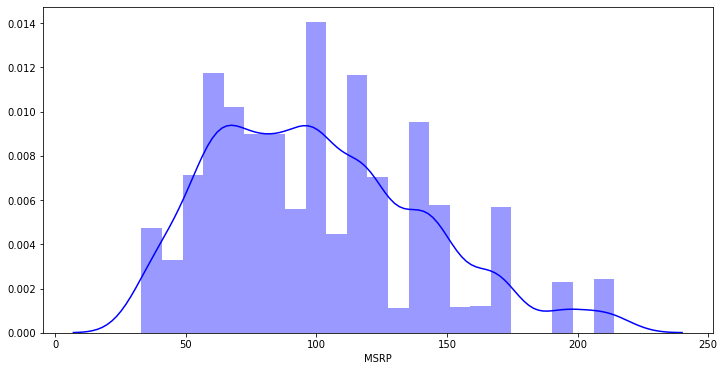

In [284]:
sns.distplot(dff['MSRP'], kde=True, hist=True, color = 'blue')

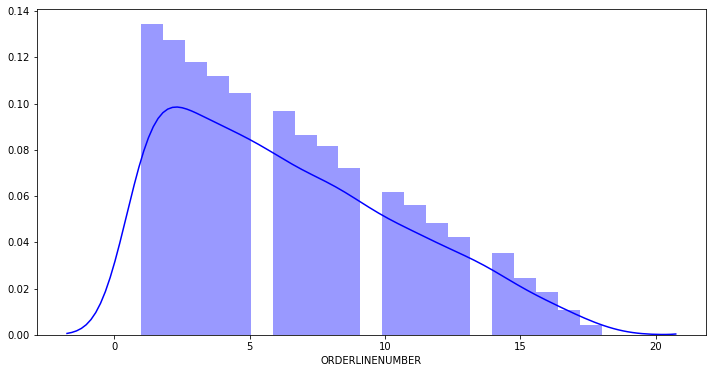

In [285]:
sns.distplot(dff['ORDERLINENUMBER'], kde=True, hist=True, color = 'blue')

## 4.4 Bivariate Analysis & Multivariate Analysis

### 4.4.1 Sales VS Month

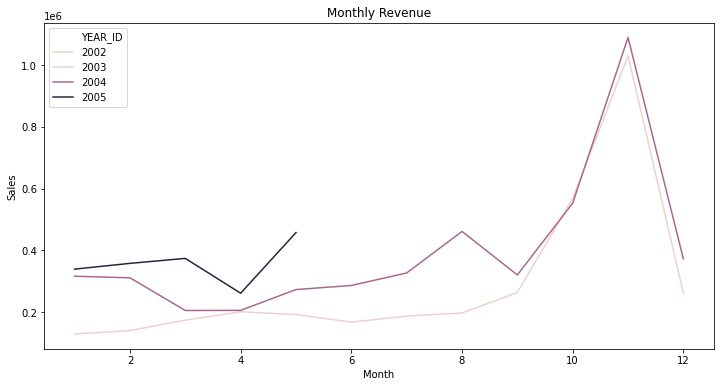

In [286]:
#Monthly Revenue
monthly_revenue = df.groupby(['YEAR_ID','MONTH_ID'])['SALES'].sum().reset_index()
monthly_revenue
sns.lineplot(x="MONTH_ID", y="SALES",hue="YEAR_ID", data=monthly_revenue)
plt.xlabel('Month')
plt.ylabel('Sales')
plt.title('Monthly Revenue')
plt.show()

- We can see that the revenue is growing in October and November. 
- It can be the result of the festive seasons.
- We can see that the revenue is higher in 2005.

### 4.4.2  Sales VS Country

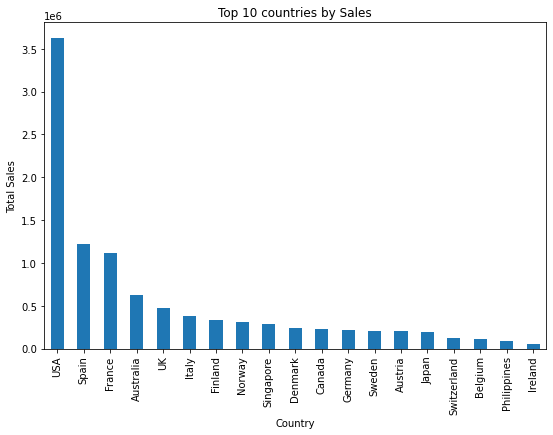

In [258]:
plt.figure(figsize=(9,6))
top_cities = df.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
top_cities.plot(kind = 'bar')
plt.title('Top 10 countries by Sales')
plt.xlabel('Country')
plt.ylabel('Total Sales')
plt.show()

In [189]:
dff.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2',
       'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trains',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'DEALSIZE_Medium', 'DEALSIZE_Small', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

### 4.4.3 Correlation Matrix

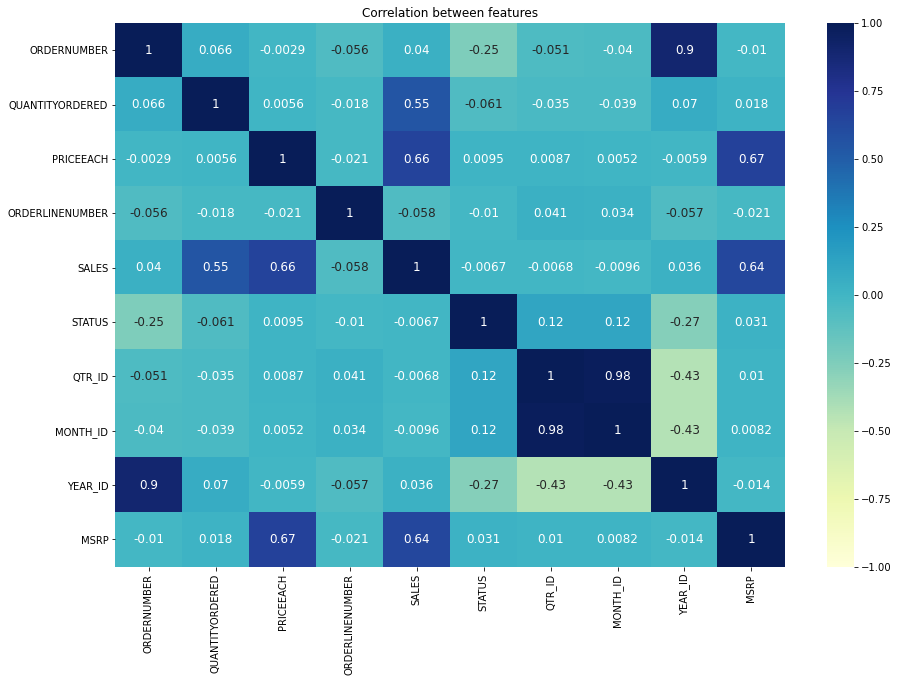

In [190]:
# To get a correlation matrix 
# Ploting correlation plot
corr = dff.iloc[:, :11].corr() 
plt.figure(figsize=(15, 10))

# plotting the heat map
# corr: give the correlation matrix
# cmap: colour code used for plotting
# vmax: gives maximum range of values for the chart
# vmin: gives minimum range of values for the chart
# annot: prints the correlation values in the chart
# annot_kws={"size": 12}): Sets the font size of the annotation

sns.heatmap(corr, cmap='YlGnBu', vmax=1.0, vmin=-1.0, annot = True, annot_kws={"size": 12})

# specify name of the plot
plt.title('Correlation between features')
plt.show()

### Observations

- QTR_ID and MONTH_ID have high correlation
- YEAR_ID and ORDERNUMBER have high correlation
- There is positive correlation between SALES, PRICEEACH, QUANTITYORDERED

### 4.4.4 Pairplot

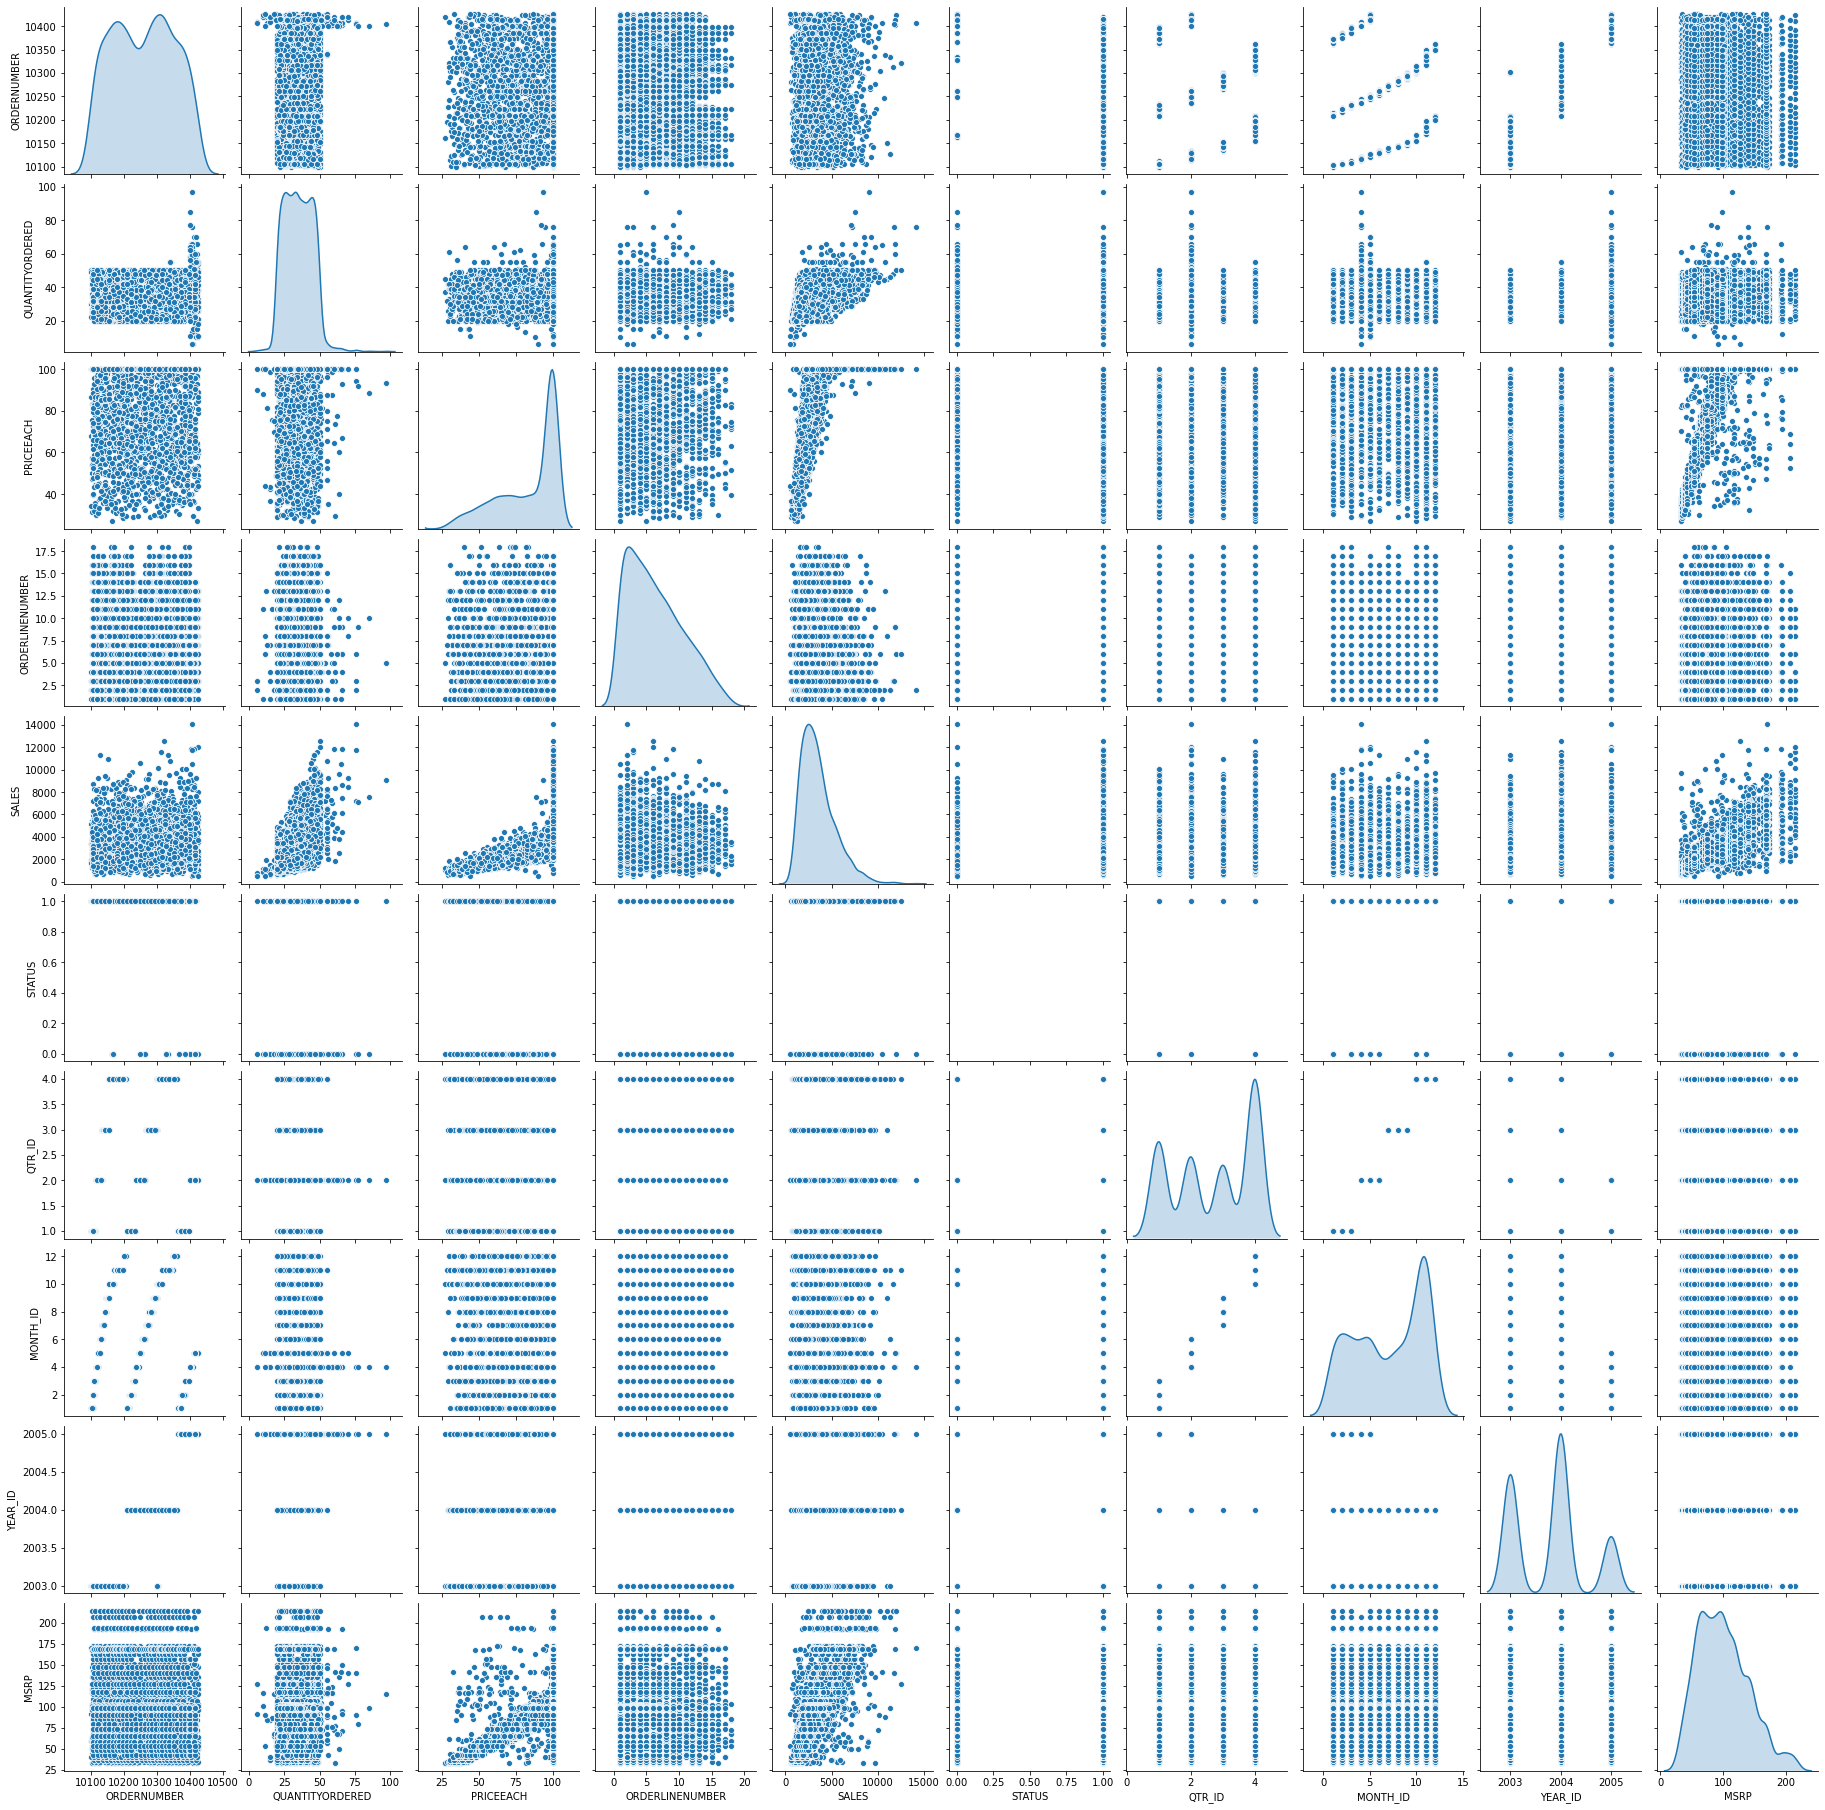

In [191]:
sns.pairplot(dff.iloc[:,:11], diag_kind='kde')

In [217]:
dff.columns

Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP',
       'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2',
       'CITY', 'STATE', 'POSTALCODE', 'TERRITORY', 'CONTACTLASTNAME',
       'CONTACTFIRSTNAME', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trains',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'DEALSIZE_Medium', 'DEALSIZE_Small', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

## 4.5 Data Preparation

In [329]:
cols_to_drop = ['ORDERNUMBER','STATUS', 'POSTALCODE', 'PRODUCTCODE', 'QTR_ID','ORDERDATE',
                'CUSTOMERNAME', 'PHONE', 'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 
                'TERRITORY','STATE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME']
df_final = dff.drop(cols_to_drop, axis=1)

In [330]:
df_final.columns

Index(['QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER', 'SALES', 'MONTH_ID',
       'YEAR_ID', 'MSRP', 'PRODUCTLINE_Motorcycles', 'PRODUCTLINE_Planes',
       'PRODUCTLINE_Ships', 'PRODUCTLINE_Trains',
       'PRODUCTLINE_Trucks and Buses', 'PRODUCTLINE_Vintage Cars',
       'DEALSIZE_Medium', 'DEALSIZE_Small', 'COUNTRY_Austria',
       'COUNTRY_Belgium', 'COUNTRY_Canada', 'COUNTRY_Denmark',
       'COUNTRY_Finland', 'COUNTRY_France', 'COUNTRY_Germany',
       'COUNTRY_Ireland', 'COUNTRY_Italy', 'COUNTRY_Japan', 'COUNTRY_Norway',
       'COUNTRY_Philippines', 'COUNTRY_Singapore', 'COUNTRY_Spain',
       'COUNTRY_Sweden', 'COUNTRY_Switzerland', 'COUNTRY_UK', 'COUNTRY_USA'],
      dtype='object')

In [331]:
df_final.head(2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,30,95.700,2,2871.000,2,2003,95,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,34,81.350,5,2765.900,5,2003,95,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [332]:
from sklearn.preprocessing import StandardScaler
features = df_final.columns

sc = StandardScaler()

df_scaled = sc.fit_transform(df_final)

data = pd.DataFrame(df_scaled, columns=df_final.columns)
data.head()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA
0,-0.523,0.597,-1.057,-0.371,-1.393,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,-0.981,1.096,-0.141,-0.109,-0.159,-0.151,-0.184,-0.354,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,1.346
1,-0.112,-0.114,-0.347,-0.428,-0.572,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,-0.981,1.096,-0.141,-0.109,-0.159,-0.151,-0.184,2.827,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,-0.743
2,0.607,0.549,-1.057,0.179,-0.025,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,1.020,-0.912,-0.141,-0.109,-0.159,-0.151,-0.184,2.827,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,-0.743
3,1.017,-0.020,-0.110,0.105,0.248,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,1.020,-0.912,-0.141,-0.109,-0.159,-0.151,-0.184,-0.354,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,1.346
4,1.428,0.810,1.783,0.897,0.795,-1.165,-0.142,2.744,-0.349,-0.301,-0.167,-0.345,-0.523,1.020,-0.912,-0.141,-0.109,-0.159,-0.151,-0.184,-0.354,-0.150,-0.075,-0.204,-0.137,-0.176,-0.096,-0.170,-0.371,-0.144,-0.105,-0.232,1.346


## 5. K Means Clustering

In [333]:
from sklearn.cluster import KMeans
# Using the elbow method to find the optimal number of clusters

wcss =[]

for i in range (1,15):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter =300, n_init = 10, random_state = 0)
    kmeans.fit(data)
    wcss.append(kmeans.inertia_)

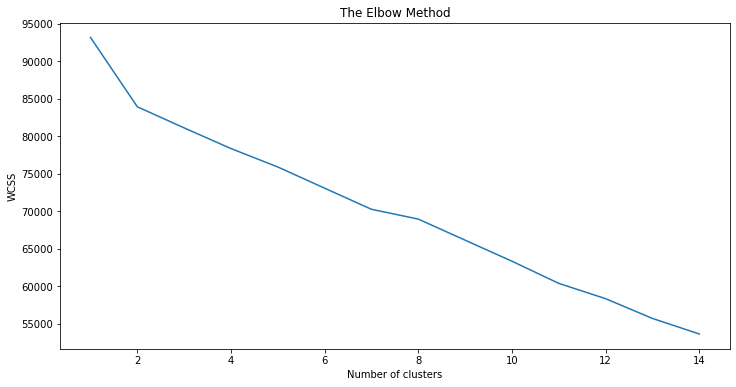

In [334]:
# Plot the graph to visualize the optimal number of cluster through the Elbow Method
plt.plot(range(1,15),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [335]:
#using silhouette score: Higher the value, better the cluster. Earlier run suggested 3
from sklearn.metrics import silhouette_score

# create a list for different values of K
n_clusters = [3, 4, 5, 6,7,8]

# use 'for' loop to build the clusters
# 'random_state' creates the sample in the same order 
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters:
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(data)
    score = silhouette_score(data, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 3, silhouette score is 0.12521863837945782)
For n_clusters = 4, silhouette score is 0.13347568640772617)
For n_clusters = 5, silhouette score is 0.1384235561056224)
For n_clusters = 6, silhouette score is 0.15305209917740648)
For n_clusters = 7, silhouette score is 0.12560497201050416)
For n_clusters = 8, silhouette score is 0.11636826090904018)


In [336]:
#run raw cluster algo
kmeans = KMeans(n_clusters=6, init = 'k-means++', max_iter = 100, n_init = 10, random_state = 0)
kmeans = kmeans.fit(data)
centroids = kmeans.cluster_centers_
print(centroids)

[[ 3.94305744e-01  6.04251078e-01 -6.39700382e-02  6.79694231e-01
  -1.50540456e-02  2.31067735e-02  4.79522009e-01  2.32305614e-02
  -7.49131917e-02 -7.71145952e-02 -6.38568223e-02  7.05334933e-02
  -9.83474579e-02  8.14208163e-01 -9.12100499e-01  3.42111716e-02
  -1.08756411e-01  9.55978329e-04 -1.51083047e-01  2.71909863e-02
   4.29230511e-02  2.03500573e-02  2.68648653e-03 -2.04199454e-01
  -6.03802956e-03  2.55893258e-02  1.87914673e-02  1.71587854e-02
   5.14354211e-02  2.85808270e-02  4.95098639e-02 -2.31843481e-01
   1.29120948e-01]
 [-4.54813592e-01 -7.47204624e-01  3.65496065e-02 -8.13862211e-01
  -2.15823333e-02  4.77145720e-03 -5.81498079e-01  5.67270997e-02
   6.10396557e-02  1.38922495e-02  5.43799151e-02 -1.18040115e-02
   6.59053263e-02 -9.80703326e-01  1.09637041e+00  2.82685580e-03
  -1.08756411e-01  4.96708436e-02 -1.51083047e-01  2.50484681e-02
   5.99591869e-02  2.27286720e-02  2.07672247e-02 -2.04199454e-01
   5.11171605e-02  2.46779257e-02  7.60740620e-03  3.2979

In [337]:
# add a column 'cluster' in the data giving cluster number corresponding to each observation
df_final['cluster'] = kmeans.labels_
df_final.head(5)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,cluster
0,30,95.700,2,2871.000,2,2003,95,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
1,34,81.350,5,2765.900,5,2003,95,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
2,41,94.740,2,3884.340,7,2003,95,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,45,83.260,6,3746.700,8,2003,95,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,49,100.000,14,5205.270,10,2003,95,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [338]:
df_final['cluster'].value_counts()

0    1363
1    1107
2     144
3     113
4      63
5      33
Name: cluster, dtype: int64

In [339]:
# get summary for observations in the cluster
df_final[df_final.cluster==0].describe()

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,cluster
count,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000,1363.000
mean,38.933,95.847,6.196,4805.572,7.037,2003.831,119.983,0.125,0.085,0.062,0.017,0.128,0.175,0.897,0.000,0.024,0.000,0.025,0.000,0.037,0.125,0.025,0.006,0.000,0.018,0.034,0.011,0.031,0.138,0.024,0.016,0.000,0.417,0.000
std,9.055,8.682,4.175,1595.785,3.692,0.722,37.251,0.331,0.279,0.241,0.129,0.335,0.380,0.304,0.000,0.154,0.000,0.156,0.000,0.190,0.331,0.156,0.076,0.000,0.132,0.183,0.104,0.173,0.345,0.154,0.126,0.000,0.493,0.000
min,20.000,55.720,1.000,3002.400,1.000,2003.000,33.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,33.000,98.320,3.000,3582.280,4.000,2003.000,95.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
50%,40.000,100.000,5.000,4357.500,8.000,2004.000,118.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,46.000,100.000,9.000,5581.380,11.000,2004.000,143.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
max,97.000,100.000,18.000,14082.800,12.000,2005.000,214.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,0.000,1.000,0.000


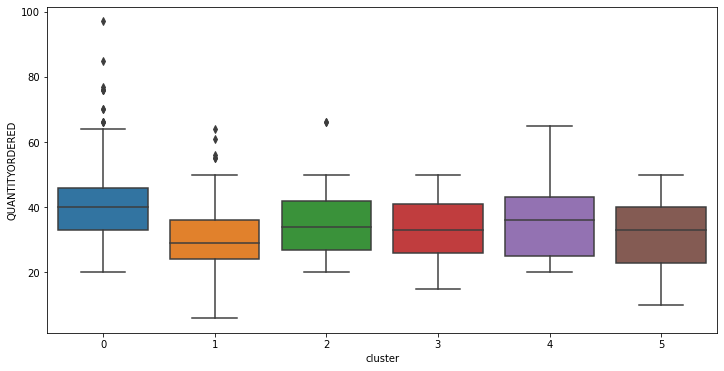

In [340]:
sns.boxplot(df_final['cluster'],df_final['QUANTITYORDERED'])

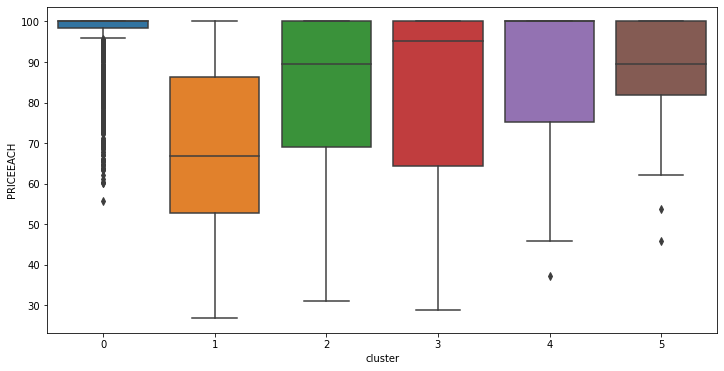

In [341]:
sns.boxplot(df_final['cluster'],df_final['PRICEEACH'])

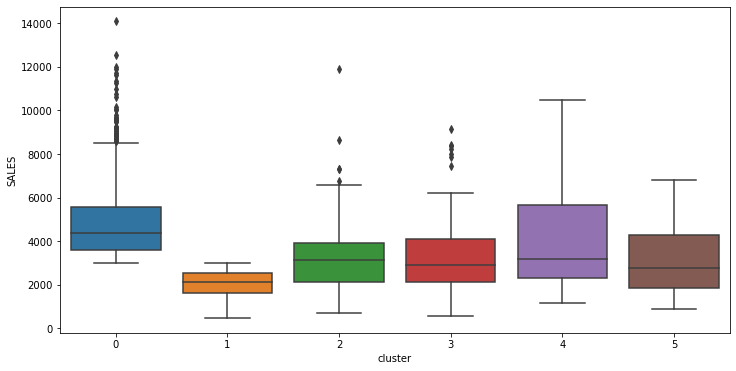

In [342]:
sns.boxplot(df_final['cluster'],df_final['SALES'])

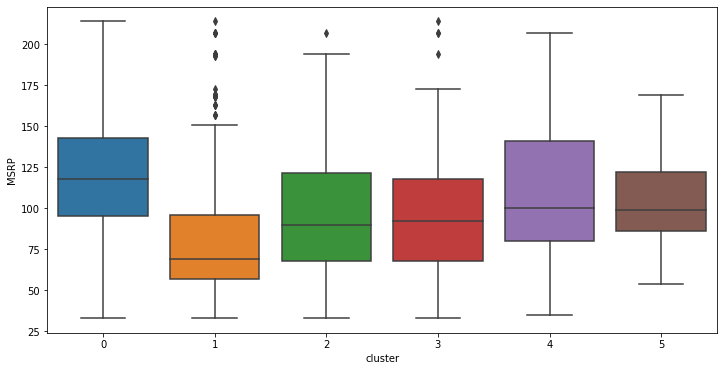

In [343]:
sns.boxplot(df_final['cluster'],df_final['MSRP'])

In [344]:
pd.crosstab(df_final['cluster'],df_final['MONTH_ID'])

MONTH_ID,1,2,3,4,5,6,7,8,9,10,11,12
cluster,,,,,,,,,,,,
0,118,108,104,81,136,58,65,94,78,146,275,100
1,105,78,84,76,97,48,46,79,84,121,214,75
2,3,0,24,9,0,23,0,0,0,23,57,5
3,0,18,0,0,14,0,15,17,9,0,40,0
4,0,15,0,11,0,2,0,0,0,27,8,0
5,3,5,0,1,5,0,15,1,0,0,3,0


In [345]:
pd.crosstab(df_final['cluster'],df_final['PRODUCTLINE_Ships'])

PRODUCTLINE_Ships,0,1
cluster,,
0,1279,84
1,1011,96
2,121,23
3,107,6
4,49,14
5,22,11


In [346]:
pd.crosstab(df_final['cluster'],df_final['DEALSIZE_Small'])

DEALSIZE_Small,0,1
cluster,,
0,1363,0
1,0,1107
2,75,69
3,51,62
4,37,26
5,15,18


## 6. Hierarchical Clustering

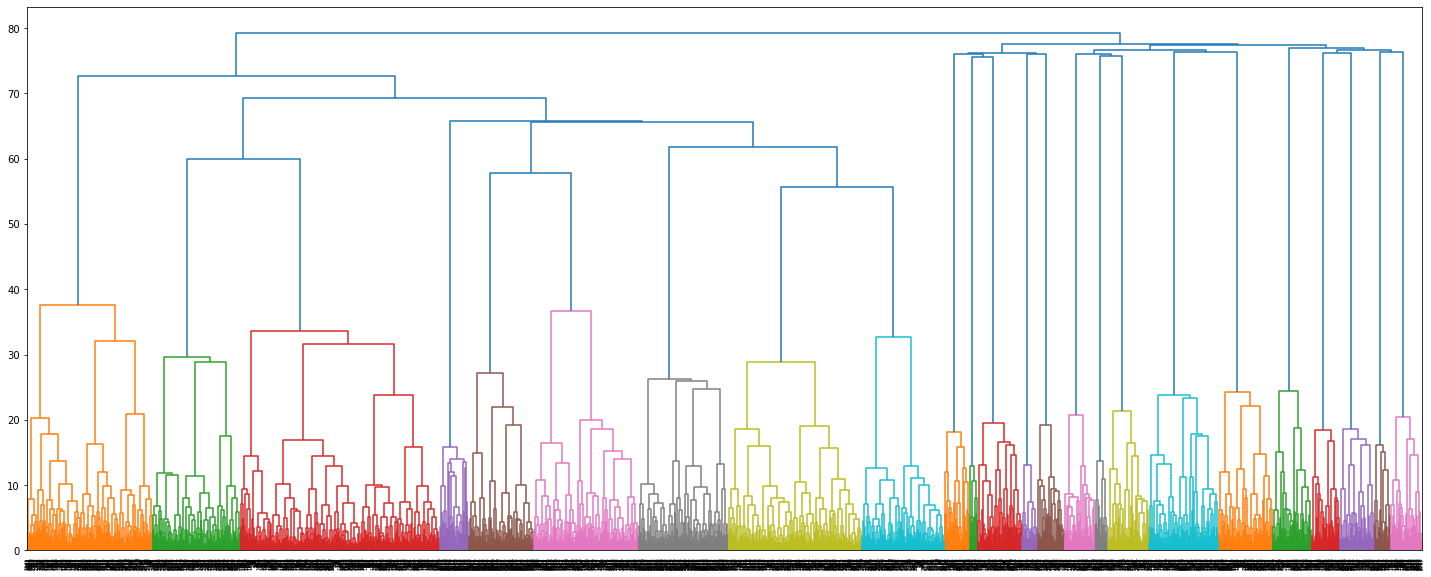

In [347]:
#### generate the linkage matrix

Z = linkage(data, 'ward', metric='euclidean')
Z.shape

plt.figure(figsize=(25, 10))
dendrogram(Z)
plt.show()

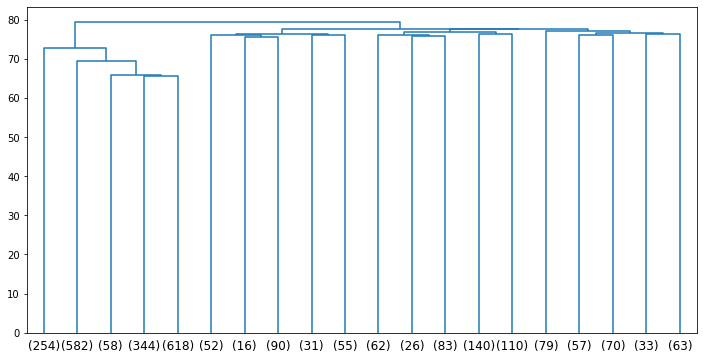

In [348]:
dendrogram(
    Z, truncate_mode='lastp',  # show only the last p merged clusters
   p=20,# show only the last p merged clusters
)
plt.show()

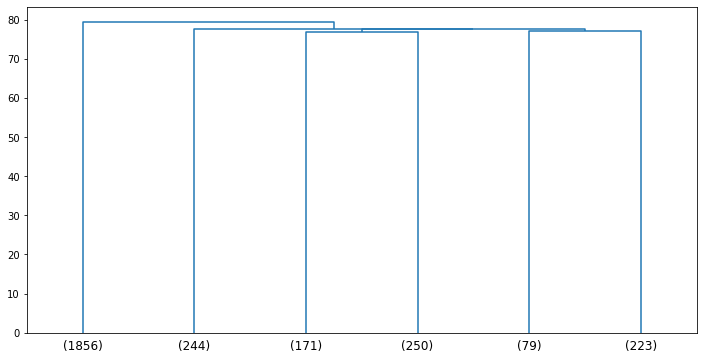

In [349]:
dendrogram(
    Z, truncate_mode='lastp',  # show only the last p merged clusters
   p=6,# show only the last p merged clusters
)
plt.show()

In [350]:
from scipy.spatial import distance
from scipy.cluster import hierarchy

orign_dists = distance.pdist(data)  # Matrix of original distances between observations
cophe_dists = hierarchy.cophenet(Z) # Matrix of cophenetic distances between observations

corr_coef = np.corrcoef(orign_dists, cophe_dists)[0,1]

corr_coef

0.5838703081746428

### We can see at least 5-6 distinct clusters

In [351]:
# Generate cluster labels
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy

cluster = AgglomerativeClustering(n_clusters=6, affinity='euclidean', linkage='ward') 

labels_hc = cluster.fit_predict(data)

In [352]:
df_final['label'] = labels_hc

df_final.head(2)

,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,MONTH_ID,YEAR_ID,MSRP,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,cluster,label
0,30,95.700,2,2871.000,2,2003,95,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,3
1,34,81.350,5,2765.900,5,2003,95,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3


In [353]:
df_final['label'].value_counts()

3    1856
1     250
2     244
0     223
5     171
4      79
Name: label, dtype: int64

## 9. Conclusion and Inferences

- From K-means clustering, we are getting 6 clusters. Here, the cluster 0 and cluster 1 are much bigger than other 4 clusters.
-From the dendrogram, there seems to be two kinds of data. We can find 4 groups from the dendrogram if we remove the highly variable data which is merging towards the end of the agglomerative clustering model. 
- Cluster profiling based on K-means clustering. These results may vary based on the random state.
- CLUSTER 0 (highest) - customers in this group buy items in high quantity. The sales amount is also on the higher side. The mean price of each item is close to 99. They are the highest buyers of products with high MSRP.
- CLUSTER 1 (lowest) - This group represents customers who buy items in varying quantities ~30, they tend to low price items ~68. Their sales are ~ 2061, they buy products with lowest MSRP.
- CLUSTER 2, 3, 4, 5 have quite similar properties. We need to analyze them deeper to understand their pattern of purchase.